# Experimentos com pêndulos

In [53]:
using Base64
using StatsBase
using CSV
using DataFrames

In [54]:
using Images
using ImageDraw
using VideoIO

In [55]:
using Plots

In [56]:
using Optim

In [57]:
using DifferentialEquations.OrdinaryDiffEq
using DifferentialEquations.RecursiveArrayTools

In [58]:
include("../../../_assets/attachments/scripts/DisplayMovie.jl")
include("../../../_assets/attachments/scripts/VideoTracking.jl")

Main.VideoTracking

<video src="../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4" controls="controls" style="max-width: 730px;">
</video>

150-element Vector{PermutedDimsArray{RGB{N0f8}, 2, (2, 1), (2, 1), Matrix{RGB{N0f8}}}}:
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.58,0.537,0.498) RGB{N0f8}(0.58,0.537,0.498)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.573,0.529,0.49) RGB{N0f8}(0.576,0.533,0.494); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11
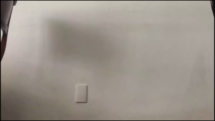
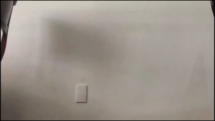
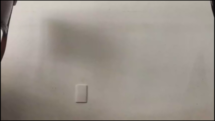
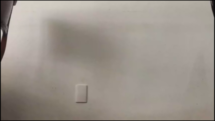
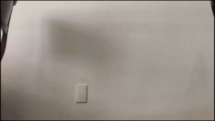
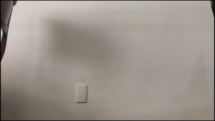
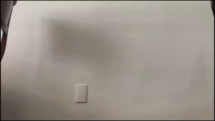
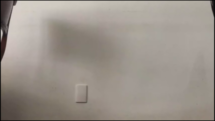
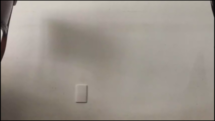
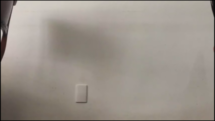
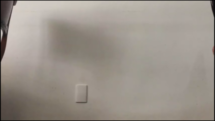
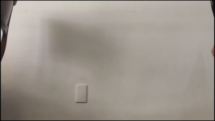
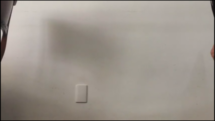
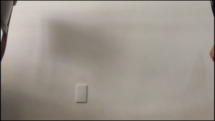
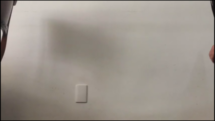
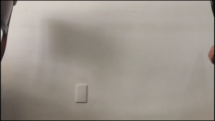
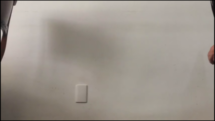
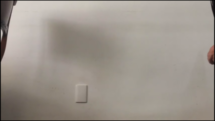
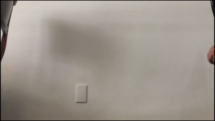
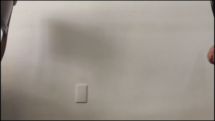
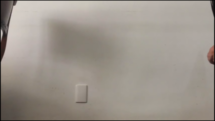
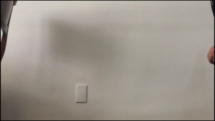
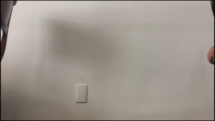
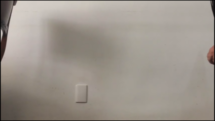
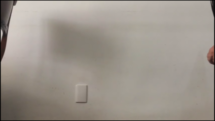
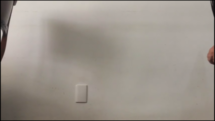
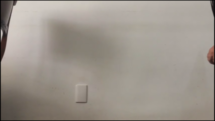
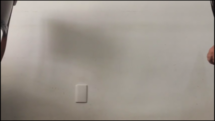
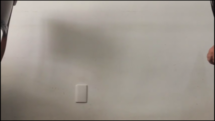
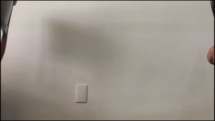
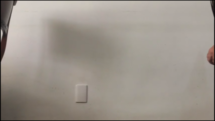
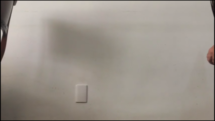
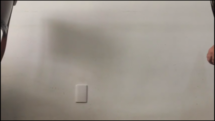
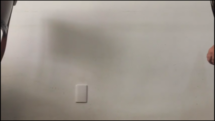
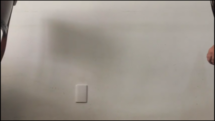
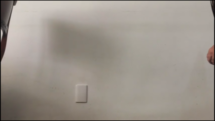
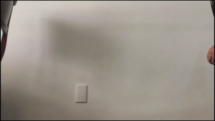
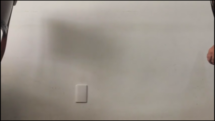
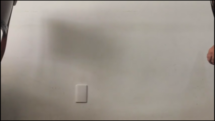
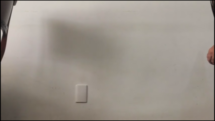
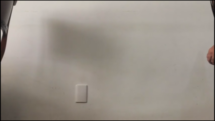
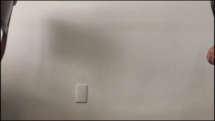
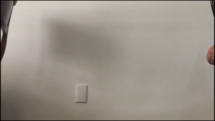
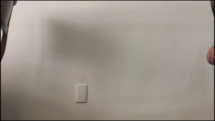
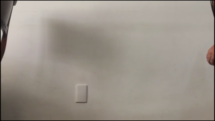
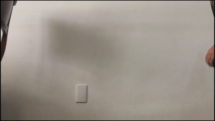
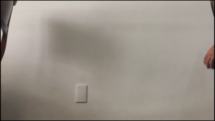
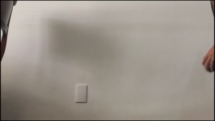
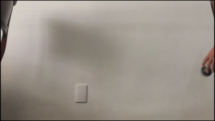
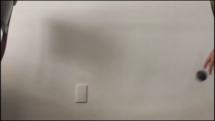
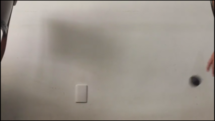
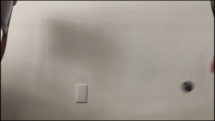
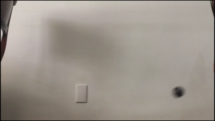
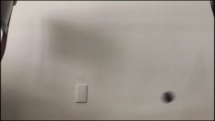
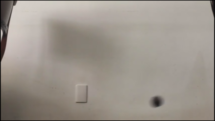
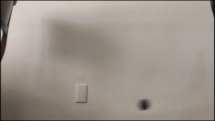
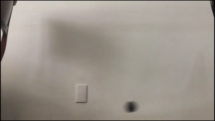
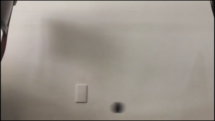
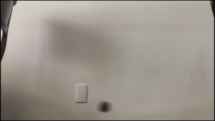
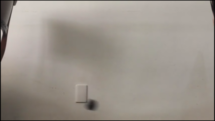
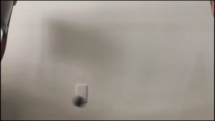
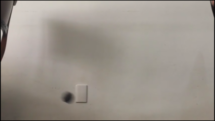
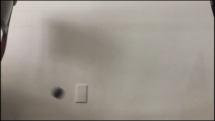
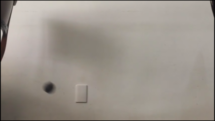
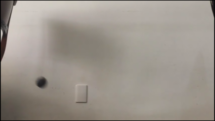
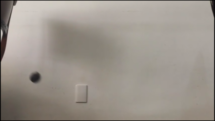
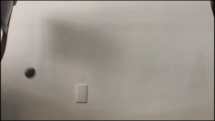
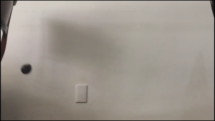
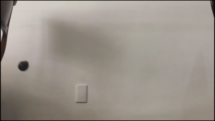
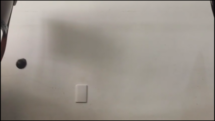
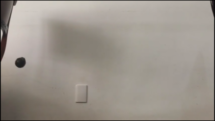
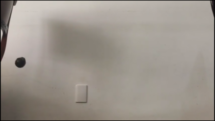
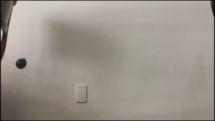
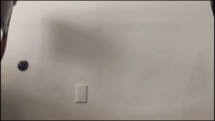
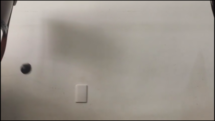
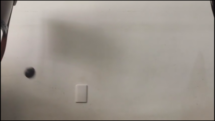
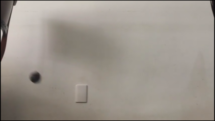
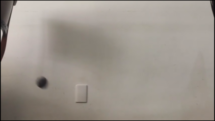
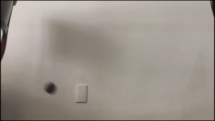
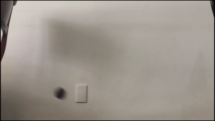
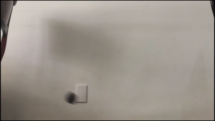
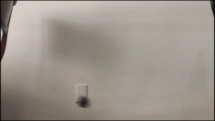
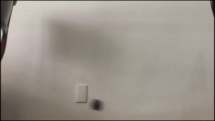
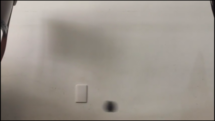
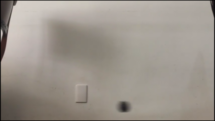
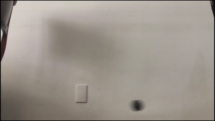
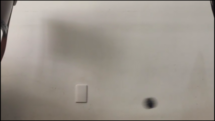
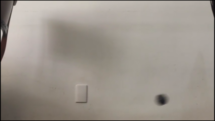
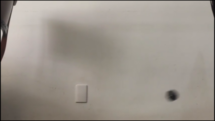
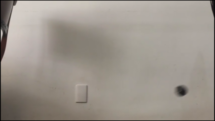
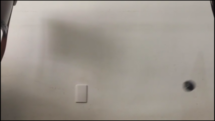
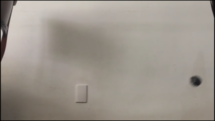
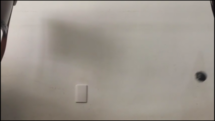
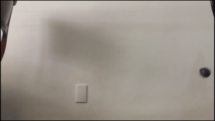
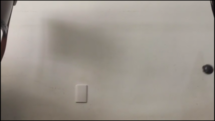
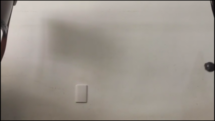
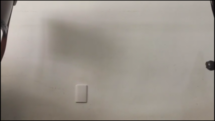
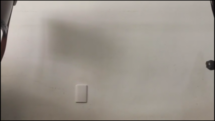
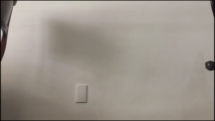
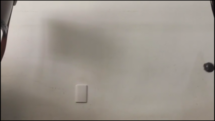
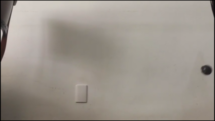
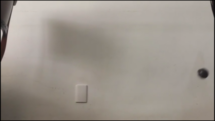
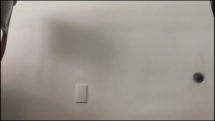
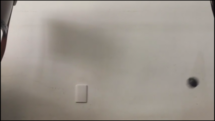
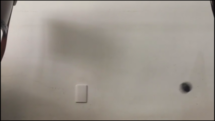
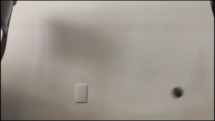
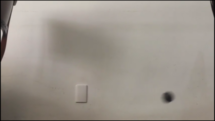
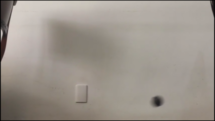
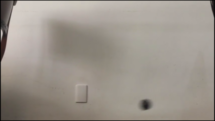
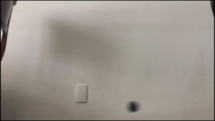
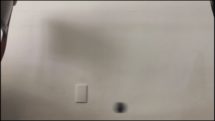
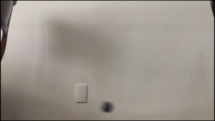
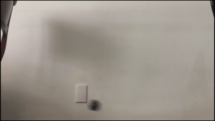
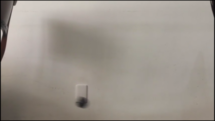
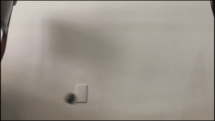
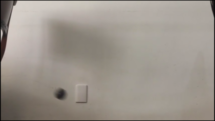
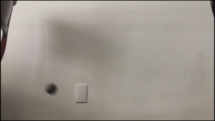
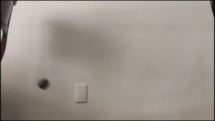
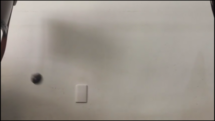
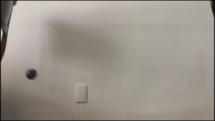
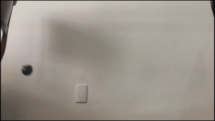
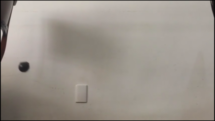
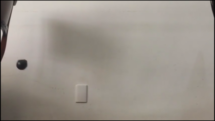
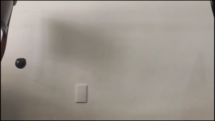
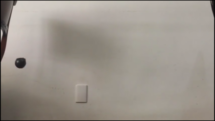
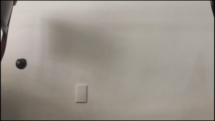
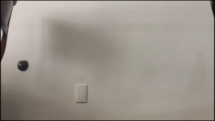
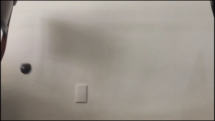
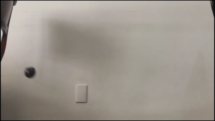
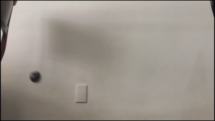
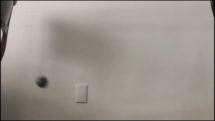
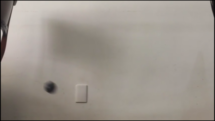
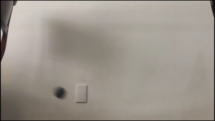
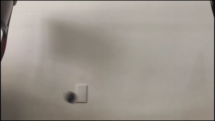
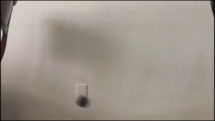
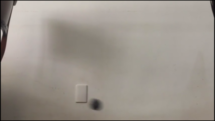
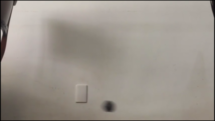
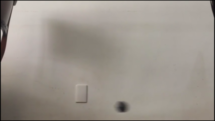
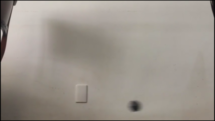
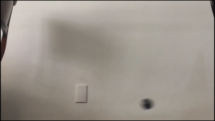
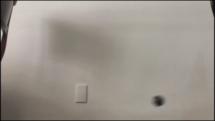
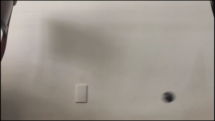
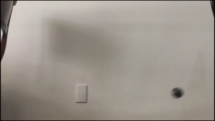
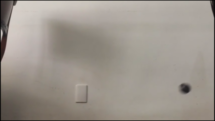
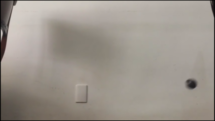
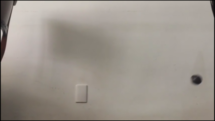
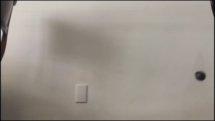
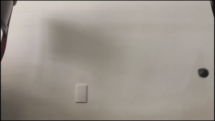
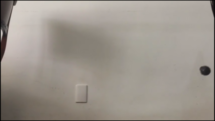
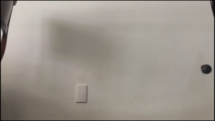

In [59]:
filename = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4"
vd = VideoIO.load(filename)

In [60]:
typeof(copy(vd[1]))

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

In [61]:
println("Duração do vídeo: $(VideoIO.get_duration(filename)) s")
println("Número de quadros: $(length(vd))")
println("Número médio de quadros por segundo: $(length(vd)/VideoIO.get_duration(filename))")

Duração do vídeo: 5.086 s
Número de quadros: 150
Número médio de quadros por segundo: 29.49272512780181


In [62]:
# video completo
filename_completo = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido.mov"
vd_completo = VideoIO.load(filename_completo)
println("""Duração do vídeo: $(VideoIO.get_duration(filename_completo)) s""")
println("Número de quadros: $(length(vd_completo))")
println("""Número médio de quadros por segundo: $(length(vd_completo)/VideoIO.get_duration(filename_completo))""")


Duração do vídeo: 16.45 s
Número de quadros: 493
Número médio de quadros por segundo: 29.969604863221885


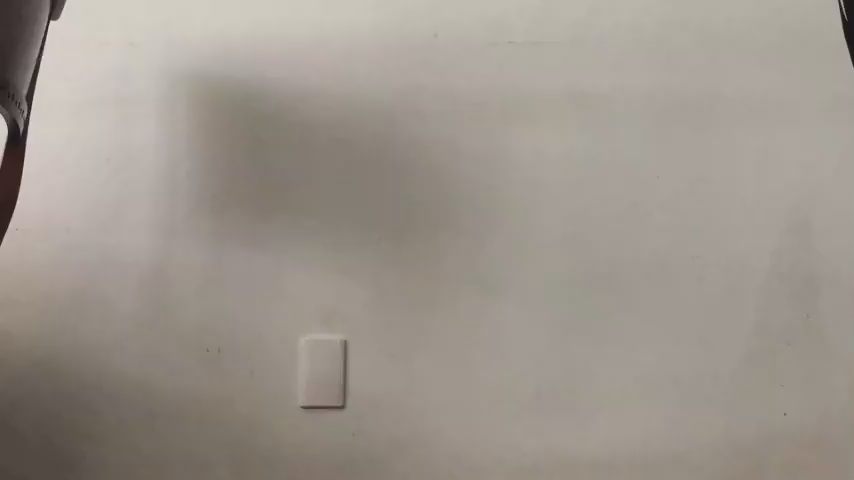

In [63]:
vd[1]

In [64]:
DisplayMovie.display_movie("../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4", embed=false)

Sorry, your browser doesn't support embedded videos.

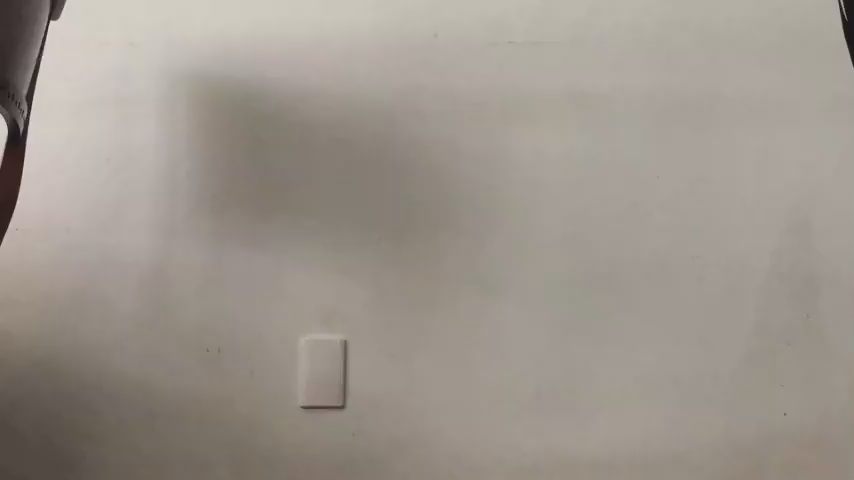

In [65]:
background = convert.(RGB{Float16}, vd[1])

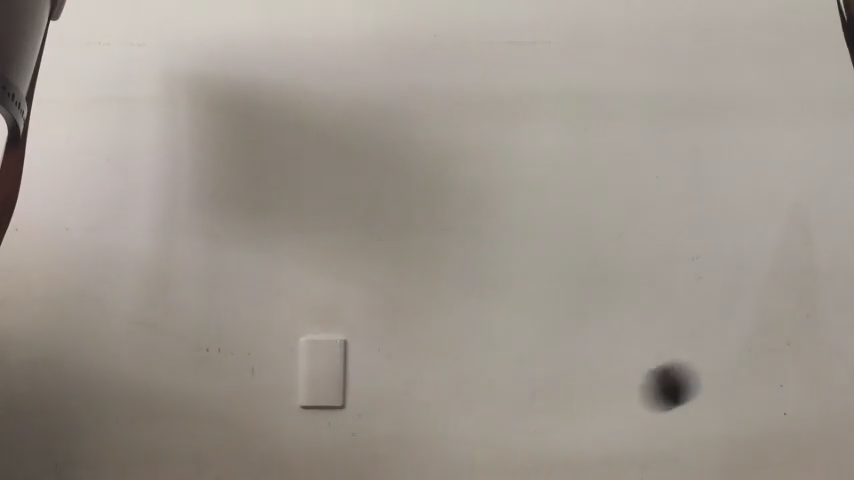

In [66]:
convert.(RGB{Float16}, vd[54])

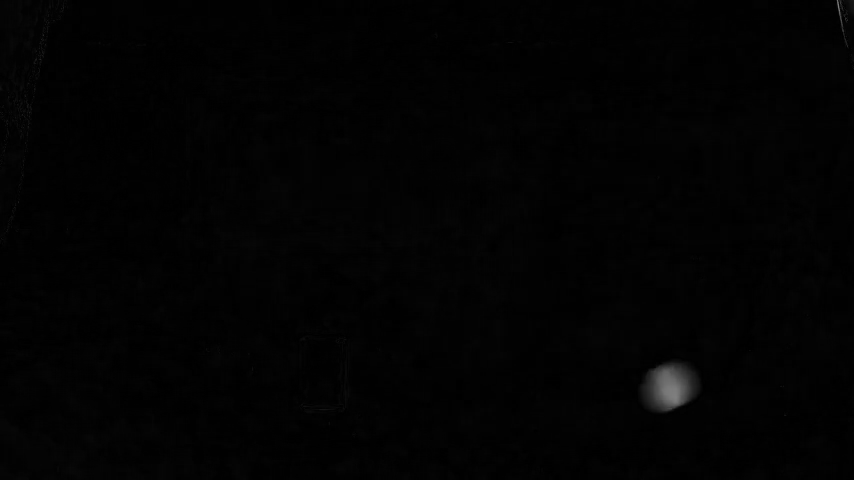

In [67]:
convert.(Gray{Float16}, abs.(convert.(RGB{Float16}, vd[54]) - background))

In [68]:
threshold = 0.1
mask = convert.(
    Gray{Float16},
    abs.(
        convert.(RGB{Float16}, vd[54]) - 
        background
    )
) .> threshold

480×854 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱           ⋮              ⋮        
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  

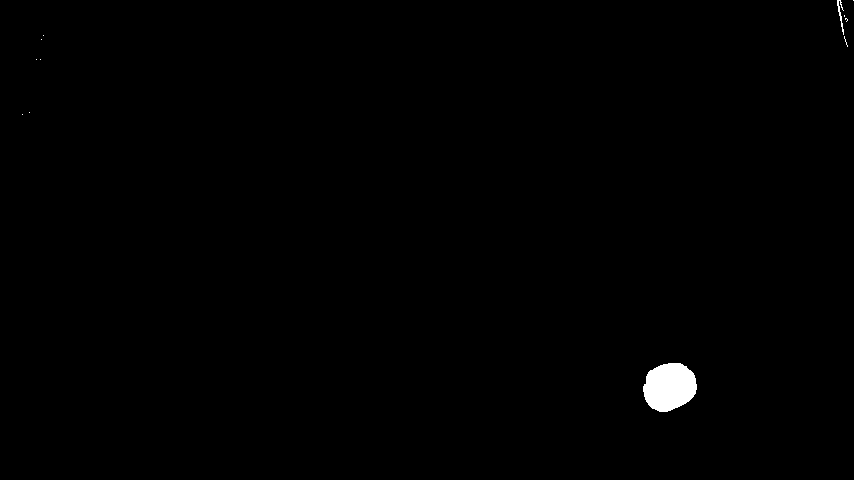

In [69]:
convert.(Gray{Float16}, mask)

In [70]:
labeled_components = label_components(mask)

480×854 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  18
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 ⋮              ⋮              ⋮     ⋱           ⋮              ⋮        
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  

In [71]:
@which label_components(mask)

label_components(A::AbstractArray; bkg, dims) in ImageMorphology at /Users/rmsrosa/.julia/packages/ImageMorphology/1lEjs/src/connected.jl:51

In [72]:
show(Docs.doc(label_components))

```
label = label_components(A; bkg = zero(eltype(A)), dims=coords_spatial(A))
label = label_components(A, connectivity; bkg = zero(eltype(A)))
```

Find the connected components in an array `A`. Components are defined as connected voxels that all have the same value distinct from `bkg`, which corresponds to the "background" component.

Specify connectivity in one of three ways:

  * A list indicating which dimensions are used to determine connectivity. For example, `dims = (1,3)` would not test neighbors along dimension 2 for connectivity. This corresponds to just the nearest neighbors, i.e., default 4-connectivity in 2d and 6-connectivity in 3d.
  * An iterable `connectivity` object with `CartesianIndex` elements encoding the displacement of each checked neighbor.
  * A symmetric boolean array of the same dimensionality as `A`, of size 1 or 3 along each dimension. Each entry in the array determines whether a given neighbor is used for connectivity analyses. For example, in two dimens

In [73]:
colorset = distinguishable_colors(maximum(labeled_components)+1, colorant"black", dropseed = false)


In [74]:
labeled_components

480×854 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  18
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 ⋮              ⋮              ⋮     ⋱           ⋮              ⋮        
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  

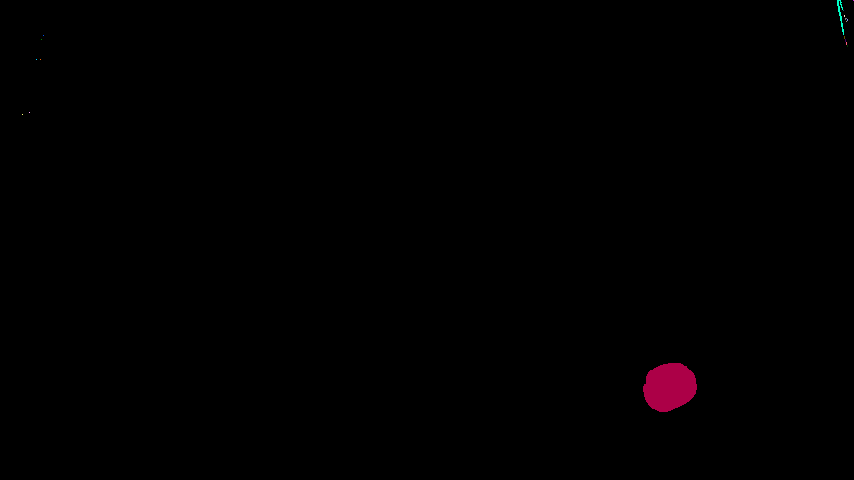

In [75]:
coloredmask = map( n -> colorset[n+1], labeled_components)

In [76]:
maximum(labeled_components)

18

In [77]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 1
filter!(p -> p.area ≥ min_area, components_location)
length(components_location)

18

In [78]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 10
filter!(p -> p.area ≥ min_area, components_location)
length(components_location)

2

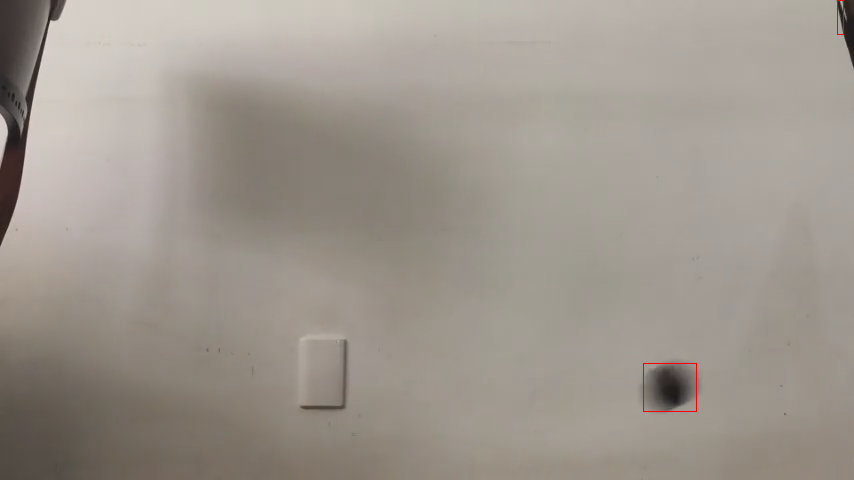

In [79]:
vd54 = copy(vd[54])
for p in components_location
    draw!(vd54, Polygon(VideoTracking.RectanglePoints(p)), colorant"red")
end
vd54

In [80]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 100
filter!(p -> p.area ≥ min_area, components_location)

1-element Vector{Main.VideoTracking.Blob}:
 Blob Object
  Centroid coordinates: (x, y) = (670.0722713864307, 387.4906588003933)
  Span values: (xspan, yspan) = (644:697, 364:412)
  Occupied: area = 2034


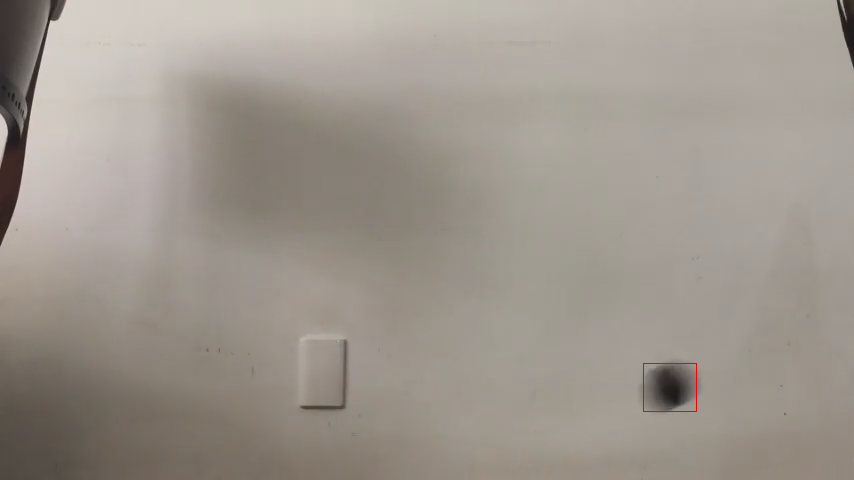

In [81]:
vd54 = copy(vd[54])
for p in components_location
    draw!(vd54, Polygon(VideoTracking.RectanglePoints(p)), colorant"red")
end
vd54

In [82]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 200
filter!(p -> p.area ≥ min_area, components_location)

1-element Vector{Main.VideoTracking.Blob}:
 Blob Object
  Centroid coordinates: (x, y) = (670.0722713864307, 387.4906588003933)
  Span values: (xspan, yspan) = (644:697, 364:412)
  Occupied: area = 2034


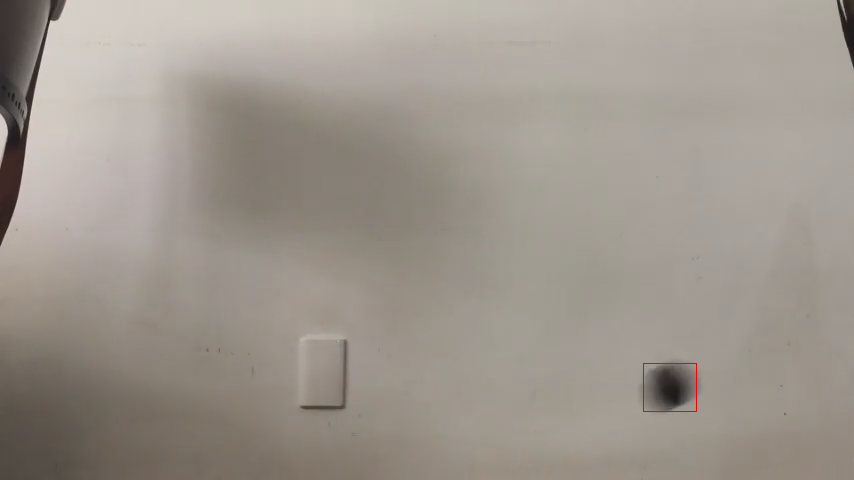

In [83]:
p = components_location[1]
draw(vd[54], Polygon(VideoTracking.RectanglePoints(p)), colorant"red")

In [84]:
filename = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4"
tracks_70cm1 = VideoTracking.find_tracks(filename)


Processing 150 frames ...   1%|▍                         |  ETA: 0:00:14

Processing 150 frames ...   2%|▌                         |  ETA: 0:00:16

Processing 150 frames ...   3%|▊                         |  ETA: 0:00:18

Processing 150 frames ...   3%|▉                         |  ETA: 0:00:21

Processing 150 frames ...   5%|█▍                        |  ETA: 0:00:16

Processing 150 frames ...   7%|█▉                        |  ETA: 0:00:14

Processing 150 frames ...  14%|███▋                      |  ETA: 0:00:10

Processing 150 frames ...  15%|████                      |  ETA: 0:00:10

Processing 150 frames ...  17%|████▌                     |  ETA: 0:00:09

Processing 150 frames ...  19%|████▉                     |  ETA: 0:00:09

Processing 150 frames ...  20%|█████▎                    |  ETA: 0:00:09

Processing 150 frames ...  21%|█████▍                    |  ETA: 0:00:09

Processing 150 frames ...  21%|█████▌                    |  ETA: 0:00:09

Processing 150 frames ...  23%|██████▏                   |  ETA: 0:00:09

Processing 150 frames ...  25%|██████▍                   |  ETA: 0:00:09

Processing 150 frames ...  26%|██████▊                   |  ETA: 0:00:11

Processing 150 frames ...  28%|███████▎                  |  ETA: 0:00:10

Processing 150 frames ...  30%|███████▊                  |  ETA: 0:00:09

Processing 150 frames ...  32%|████████▍                 |  ETA: 0:00:09

Processing 150 frames ...  34%|████████▉                 |  ETA: 0:00:08

Processing 150 frames ...  35%|█████████                 |  ETA: 0:00:08

Processing 150 frames ...  36%|█████████▍                |  ETA: 0:00:08

Processing 150 frames ...  37%|█████████▊                |  ETA: 0:00:08

Processing 150 frames ...  39%|██████████                |  ETA: 0:00:08

Processing 150 frames ...  41%|██████████▋               |  ETA: 0:00:07

Processing 150 frames ...  43%|███████████▎              |  ETA: 0:00:07

Processing 150 frames ...  45%|███████████▊              |  ETA: 0:00:06

Processing 150 frames ...  47%|████████████▎             |  ETA: 0:00:06

Processing 150 frames ...  49%|████████████▋             |  ETA: 0:00:06

Processing 150 frames ...  51%|█████████████▏            |  ETA: 0:00:06

Processing 150 frames ...  52%|█████████████▌            |  ETA: 0:00:05

Processing 150 frames ...  53%|█████████████▉            |  ETA: 0:00:05

Processing 150 frames ...  55%|██████████████▎           |  ETA: 0:00:05

Processing 150 frames ...  56%|██████████████▌           |  ETA: 0:00:05

Processing 150 frames ...  57%|██████████████▉           |  ETA: 0:00:05

Processing 150 frames ...  59%|███████████████▎          |  ETA: 0:00:05

Processing 150 frames ...  60%|███████████████▋          |  ETA: 0:00:04

Processing 150 frames ...  61%|████████████████          |  ETA: 0:00:04

Processing 150 frames ...  63%|████████████████▎         |  ETA: 0:00:04

Processing 150 frames ...  64%|████████████████▋         |  ETA: 0:00:04

Processing 150 frames ...  66%|█████████████████▏        |  ETA: 0:00:04

Processing 150 frames ...  68%|█████████████████▋        |  ETA: 0:00:03

Processing 150 frames ...  70%|██████████████████▎       |  ETA: 0:00:03

Processing 150 frames ...  71%|██████████████████▌       |  ETA: 0:00:03

Processing 150 frames ...  72%|██████████████████▊       |  ETA: 0:00:03

Processing 150 frames ...  73%|███████████████████▏      |  ETA: 0:00:03

Processing 150 frames ...  75%|███████████████████▋      |  ETA: 0:00:03

Processing 150 frames ...  78%|████████████████████▎     |  ETA: 0:00:02

Processing 150 frames ...  81%|█████████████████████     |  ETA: 0:00:02

Processing 150 frames ...  82%|█████████████████████▍    |  ETA: 0:00:02

Processing 150 frames ...  84%|█████████████████████▉    |  ETA: 0:00:02

Processing 150 frames ...  87%|██████████████████████▌   |  ETA: 0:00:01

Processing 150 frames ...  89%|███████████████████████▎  |  ETA: 0:00:01

Processing 150 frames ...  92%|███████████████████████▉  |  ETA: 0:00:01

Processing 150 frames ...  95%|████████████████████████▋ |  ETA: 0:00:01

Processing 150 frames ...  97%|█████████████████████████▎|  ETA: 0:00:00

Processing 150 frames ...  99%|█████████████████████████▋|  ETA: 0:00:00

Processing 150 frames ...  99%|█████████████████████████▉|  ETA: 0:00:00

Processing 150 frames ... 100%|██████████████████████████| Time: 0:00:09


1-element Vector{Main.VideoTracking.Track}:
 Tracked blob with framespan nspan = 13:55


In [87]:
VideoTracking.tracks_on_video(filename, tracks_70cm1)

┌ Info: Video saved with 150 frames and 1 tracks
└ @ Main.VideoTracking /Users/rmsrosa/Documents/git-repositories/modelagem_matematica/_assets/attachments/scripts/VideoTracking.jl:150


In [88]:
DisplayMovie.display_movie("../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto_tracked.mp4")

Sorry, your browser doesn't support embedded videos.

In [89]:
tracks_70cm1

1-element Vector{Main.VideoTracking.Track}:
 Tracked blob with framespan nspan = 13:55


In [90]:
tracks_70cm1[1].nspan

13:55

In [91]:
tracks_70cm1[1].path

43-element Vector{Main.VideoTracking.Blob}:
 Blob Object
  Centroid coordinates: (x, y) = (849.1062271062272, 208.7948717948718)
  Span values: (xspan, yspan) = (840:854, 177:240)
  Occupied: area = 546

 Blob Object
  Centroid coordinates: (x, y) = (847.6581769436997, 214.25067024128685)
  Span values: (xspan, yspan) = (837:854, 183:247)
  Occupied: area = 746

 Blob Object
  Centroid coordinates: (x, y) = (846.3590285110877, 217.86061246040126)
  Span values: (xspan, yspan) = (834:854, 183:253)
  Occupied: area = 947

 Blob Object
  Centroid coordinates: (x, y) = (845.1462585034013, 220.17942176870747)
  Span values: (xspan, yspan) = (831:854, 183:256)
  Occupied: area = 1176

 Blob Object
  Centroid coordinates: (x, y) = (843.8523297491039, 222.40071684587812)
  Span values: (xspan, yspan) = (829:854, 179:257)
  Occupied: area = 1395

 Blob Object
  Centroid coordinates: (x, y) = (843.0366013071896, 223.26797385620915)
  Span values: (xspan, yspan) = (827:854, 179:258)
  Occupied: a

In [92]:
tracks_70cm1[1].path[1]

Blob Object
  Centroid coordinates: (x, y) = (849.1062271062272, 208.7948717948718)
  Span values: (xspan, yspan) = (840:854, 177:240)
  Occupied: area = 546


In [93]:
plt = plot(title = "Paths of $(length(tracks_70cm1)) track(s)", titlefont = 10,
    xlims = (1,854), ylims = (1, 480),
    size = (854, 480), aspect = :equal, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, getfield.(tr.path, :x), 481 .- getfield.(tr.path, :y), label="track $n")
end
display(plt)

InterruptException: InterruptException:

In [94]:
plt = plot(title = "Coordinate x of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topleft)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, getfield.(tr.path, :x), label="track $n")
end
display(plt)

InterruptException: InterruptException:

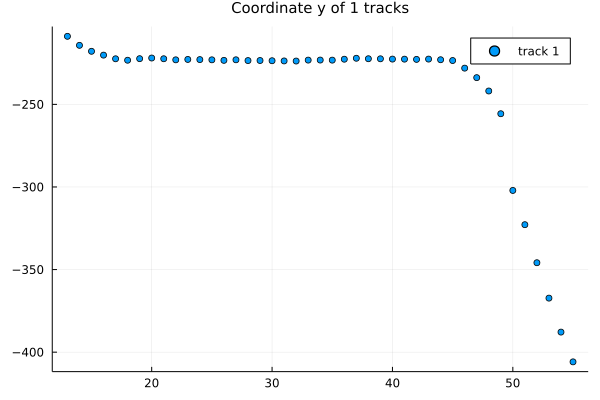

In [95]:
plt = plot(title = "Coordinate y of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, - getfield.(tr.path, :y), label="track $n")
end
display(plt)

In [96]:
size(vd[1])

(480, 854)

In [97]:
data_x = getfield.(tracks_70cm1[1].path, :x)
data_y = size(vd[1], 1) + 1 .- getfield.(tracks_70cm1[1].path, :y)
nothing

In [98]:
n_minima = Int[]
for j in 40:length(data_x)-1
    if data_x[j-1] > data_x[j] < data_x[j+1]
        push!(n_minima, j + first(tracks_70cm1[1].nspan) - 1)
    end
end
n_minima

Int64[]

In [99]:
plt = plot(title = "Coordinate x of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topleft)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, getfield.(tr.path, :x), label="track $n")
end
vline!(plt, n_minima, label = "minima")
display(plt)

BoundsError: BoundsError: attempt to access 0-element Vector{Float64} at index [1]

In [100]:
(n_minima[2:end] - n_minima[1:end-1]) / 29.5

Float64[]

In [101]:
g = 9.8 # m/s
l = 0.7 # m
T_p = 2π * √(l / g)

1.679251908362714

In [102]:
function medias(a::Real, b::Real)
    (a ≥ 0 && b ≥ 0) || throw(ArgumentError("arguments must be nonnegative"))
    ma = (a + b)/2
    mg = sqrt(a * b)
    return ma, mg
end

function agm(a::Real, b::Real; tol::Real = 1e-10, maxiter::Int = 100)
    tol > 0 || throw(ArgumentError("tolerance must be positive"))
    maxiter > 0 || throw(ArgumentError("maximum number of iterations must be positive"))
    y1, y2 = a, b
    n = 0
    while abs(y1 - y2) > tol && n < maxiter
        y1, y2 = medias(y1, y2)
        n += 1
    end
    return (y1 + y2)/2, abs(y1 - y2), n
end

agm (generic function with 1 method)

In [103]:
θ₀ = π / 4
T_p / agm(1, cos(θ₀ / 2))[1]

1.7463772212095845

### Escala

* Vamos fazer ajustar um circunferência ao movimento do pêndulo, para descobrir a escala espacial.

In [104]:
error(u) = sum(
    abs2,
    (data_x[50:end] .- u[1]).^2 + (data_y[50:end] .- u[2]).^2 .- u[3]^2
    ) / length(data_x)

error (generic function with 1 method)

In [105]:
center_point = Optim.optimize(error, [400.0, 800.0, 500])

 * Status: success

 * Candidate solution
    Final objective value:     0.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    5


In [106]:
Optim.minimum(center_point)

0.0

In [107]:
center_nx, center_ny, radius_n = Optim.minimizer(center_point)

3-element Vector{Float64}:
 400.0
 800.0
 500.0

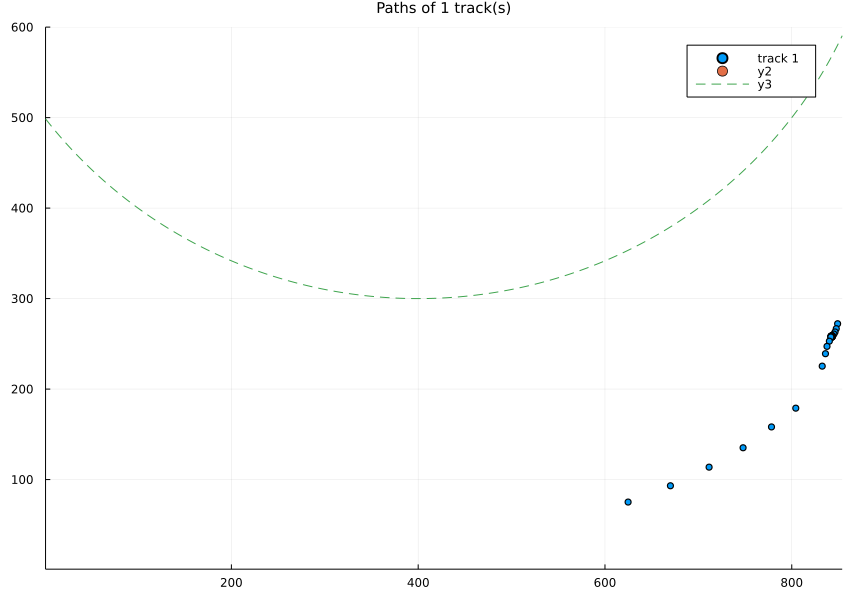

In [108]:
plt = plot(title = "Paths of $(length(tracks_70cm1)) track(s)", titlefont = 10,
    xlims = (1,854), ylims = (1, 600),
    size = (854, 600), aspect = :equal, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, data_x, data_y, label="track $n")
end
scatter!(plt, (center_nx, center_ny), markersize = 10)
plot!(plt, 1:854, nx -> center_ny - √(radius_n^2 - (nx - center_nx)^2), linestyle = :dash)
display(plt)

In [109]:
scale = radius_n / l # points per meter

714.2857142857143

In [110]:
data_scaled_x = (data_x .- center_nx) / scale
data_scaled_y = (data_y .- center_ny) / scale

43-element Vector{Float64}:
 -0.7389128205128205
 -0.7465509383378015
 -0.7516048574445617
 -0.7548511904761904
 -0.7579610035842294
 -0.7591751633986928
 -0.7578617608409987
 -0.7573114996637526
 -0.7579285520974289
 -0.7588410614525138
  ⋮
 -0.7739510781194767
 -0.7852523725834797
 -0.8045237878787878
 -0.8695302526186075
 -0.8985568965517241
 -0.9307943502824857
 -0.9607938574938573
 -0.9895857142857141
 -1.0147971257485031

In [111]:
function dudt_pendulum!(du, u, p, t)
    θ, ω = u
    l, g, α = p
    du[1] = ω
    du[2] = - (g / l) * sin(θ) - α * ω
end

dudt_pendulum! (generic function with 1 method)

In [112]:
g = 9.8 # 9,8 m/s^2
l = 0.7 # 70 cm
α = 0
p = [l, g, α]
θ₀ = π/6
ω₀ = 0.0
u₀ = [θ₀, ω₀]
tspan = (0.0, 5.0) # até 5 segundos
prob_pendulum = ODEProblem(dudt_pendulum!, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 2-element Vector{Float64}:
 0.5235987755982988
 0.0

In [113]:
sol = solve(prob_pendulum, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 32-element Vector{Float64}:
 0.0
 0.00014258482589892232
 0.0015684330848881453
 0.015826915674780374
 0.05520287578278107
 0.1186994834079412
 0.20021318382712075
 0.3059148580456768
 0.4289016257510082
 0.556918677400161
 ⋮
 3.336085982741865
 3.5798111245515645
 3.789943545334064
 4.033677951692835
 4.248777445772274
 4.4897245954065665
 4.712943195270591
 4.948794481749135
 5.0
u: 32-element Vector{Vector{Float64}}:
 [0.5235987755982988, 0.0]
 [0.5235987044417862, -0.000998093740288535]
 [0.5235901656815024, -0.01097897701799843]
 [0.52272227807514, -0.1107323314966049]
 [0.5129658631370241, -0.3840406425996626]
 [0.4749871723737738, -0.8072478724104671]
 [0.38897468427160925, -1.2882714483013225]
 [0.22681172050256487, -1.7418841189469372]
 [-0.0034489023047863383, -1.936781391381158]
 [-0.24165889846355013, -1.7139642610036754]
 ⋮
 [0.5009792538381039, 0.5577247215218519]
 [0.43312617648070506, -1.08006

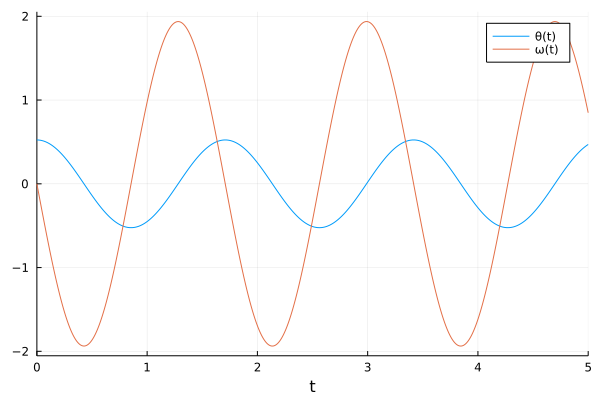

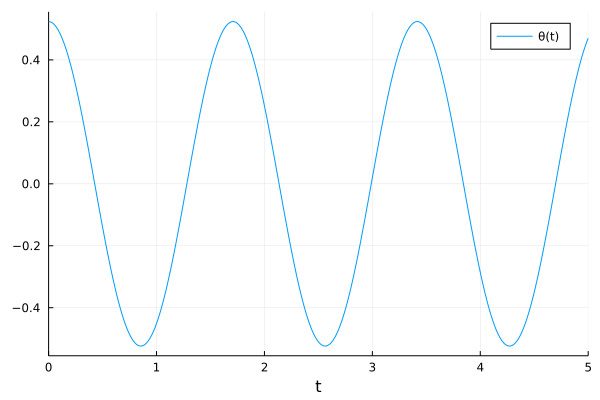

In [115]:
display(plot(sol, label = ["θ(t)" "ω(t)"]))
display(plot(sol, vars = 1, label = "θ(t)"))

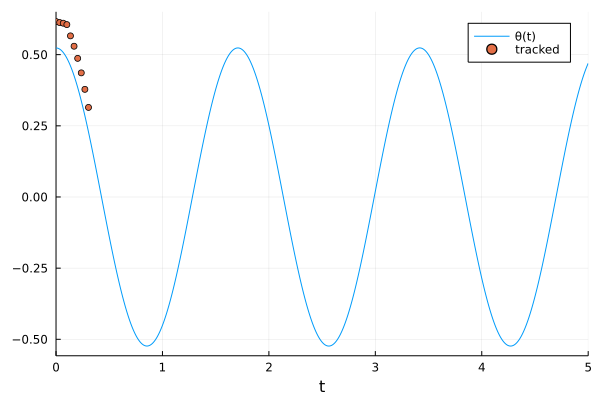

In [116]:
n0 = 34
plt = plot(sol, vars = 1, label = "θ(t)")
scatter!(plt, (0:length(data_x)-n0) ./ 29.5, data_scaled_x[n0:end], label="tracked")
display(plt)

In [141]:
df = CSV.read("../../../_assets/attachments/data/pendulo_70cm_reduzido.csv", DataFrame)

481×3 DataFrame
 Row │ nf     nx       ny      
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │    13  848.727  209.073
   2 │    14  847.362  212.843
   3 │    15  846.127  216.006
   4 │    16  844.89   218.281
   5 │    17  843.577  220.369
   6 │    18  842.701  221.178
   7 │    19  842.682  220.634
   8 │    20  842.833  220.468
  ⋮  │   ⋮       ⋮        ⋮
 475 │   487  236.224  348.115
 476 │   488  211.528  329.685
 477 │   489  190.97   312.452
 478 │   490  174.485  297.065
 479 │   491  162.013  283.93
 480 │   492  154.255  274.632
 481 │   493  150.403  268.847
               466 rows omitted

In [118]:
plt = plot(title = "Coordinate x", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, df.nx, label = nothing)
display(plt)

plt = plot(title = "Coordinate y", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, size(vd[1], 1) .+ 1 .- df.ny, label = nothing)
display(plt)

UndefVarError: UndefVarError: df not defined

In [119]:
data2_scaled_t = (df.nf[n0:end] .- df.nf[n0]) / 29.97
data2_scaled_x = (df.nx[n0:end] .- center_nx) / scale
data2_scaled_y = (size(vd[1], 1) .+ 1 .- df.ny[n0:end] .- center_ny ) / scale
display(scatter(data2_scaled_t, data2_scaled_x))
display(scatter(data2_scaled_t, data2_scaled_y))

UndefVarError: UndefVarError: df not defined

In [120]:
n_minima2 = Int[]
for j in 40:length(df.nx)-1
    if df.nx[j-1] > df.nx[j] < df.nx[j+1]
        push!(n_minima2, j + df.nf[1] - 1)
    end
end
n_minima2

UndefVarError: UndefVarError: df not defined

In [121]:
(n_minima2[2:end] - n_minima2[1:end-1])/30

Float64[]

In [122]:
sum(n_minima2[2:end] - n_minima2[1:end-1])/7/30

0.0

In [123]:
plt = plot(title = "Coordinate x", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, df.nx, label = "data")
vline!(plt, n_minima2, label = "minima")
display(plt)

UndefVarError: UndefVarError: df not defined

In [124]:
g = 9.8 # 9,8 m/s^2
l = 0.7 # 70 cm
α = 0
p = [l, g, α]
θ₀ = π/6
ω₀ = 0.0
u₀ = [θ₀, ω₀]
tspan2 = (0.0, 16.45)
prob_pendulum2 = ODEProblem(dudt_pendulum!, u₀, tspan2, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 16.45)
u0: 2-element Vector{Float64}:
 0.5235987755982988
 0.0

In [125]:
VideoIO.get_duration("../../../_assets/attachments/img/pendulo_70cm_1_reduzido.mov")

ErrorException: Could not open img/pendulo_70cm_1_reduzido.mov. avformat_open_input error code -2

In [126]:
θ₀ = π / 6
α = 0.0 #-0.1
remake(prob_pendulum2; u0 = [θ₀, 0.0], p = [l, g, α])
sol2 = solve(prob_pendulum2, Tsit5(); saveat = 1/29.87)
data2_scaled_x[1:10] .- sol2(data2_scaled_t)[1,1:10]
#length(sol[1,:])
#sol(data2_scaled_t)[1,:]
sol(data2_scaled_t)

UndefVarError: UndefVarError: data2_scaled_x not defined

In [127]:
plot(data2_scaled_t, sol2(data2_scaled_t)[1,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")

UndefVarError: UndefVarError: data2_scaled_t not defined

In [128]:
function ddu_pendulum!(ddu, du, u, p, t)
    θ = u[1]
    ω = du[1]
    l, g, α = p
    ddu[1] = - (g / l) * sin(θ) - α * ω
end

ddu_pendulum! (generic function with 1 method)

In [129]:
θ₀ = π / 6
ω₀ = 0.0
α = 0.05
l = 0.72
p = [l, g, α]
prob_pendulum_2nd = SecondOrderODEProblem(ddu_pendulum!, [ω₀], [θ₀], tspan2, p)
sol_2nd = solve(prob_pendulum_2nd)
sol_2nd.retcode

:Success

In [130]:
plot(data2_scaled_t, sol_2nd(data2_scaled_t)[2,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")

UndefVarError: UndefVarError: data2_scaled_t not defined

In [131]:
prob_rmk = remake(prob_pendulum_2nd; u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])
sol_rmk = solve(prob_rmk)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 81-element Vector{Float64}:
  0.0
  0.00014665867806746294
  0.0016132454587420922
  0.016279113265488386
  0.05646261671975408
  0.1210661584895972
  0.20394094443174465
  0.3114428714445593
  0.4361696895237713
  0.5660126318578794
  ⋮
 14.757103758523856
 14.975837242139237
 15.220528172168207
 15.435739323889688
 15.681990504266405
 15.899891324886354
 16.144987068343934
 16.367029004899734
 16.45
u: 81-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0], [0.5235987755982988])
 ([-0.0009980900796482302], [0.523598702408922])
 ([-0.010978532676025766], [0.5235899199226164])
 ([-0.11068567653652728], [0.5226974863498236])
 ([-0.3813143284771497], [0.5127947624143488])
 ([-0.7977890197442175], [0.4745408968992312])
 ([-1.268356249332695], [0.38830121752424207])
 ([-1.7078585641373931], [0.22627879083954483])
 ([-1.8891348315194079], [-0.0020668325633487585])
 ([-1.662706

In [132]:
function objective(β)
    g = 9.8
    ω₀ = 0.0
    θ₀, l, α = β
    p = [l, g, α]
    tspan2 = (0.0, 16.45)
    prob = remake(prob_pendulum_2nd, u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])
    sol = solve(prob)
    #prob = SecondOrderODEProblem(ddu_pendulum!, [ω₀], [θ₀], tspan2, p)
    #sol = solve(prob)
    return mse(data2_scaled_x, sol(data2_scaled_t)[2,:])
end

objective (generic function with 1 method)

In [133]:
res = Optim.optimize(objective, [π / 3, 0.7, 0.0])

UndefVarError: UndefVarError: data2_scaled_t not defined

In [134]:
θ₀, l, α = Optim.minimizer(res)

UndefVarError: UndefVarError: res not defined

In [135]:
π / θ₀

6.0

In [136]:
θ₀ - π / 5.6529

-0.032150070761939875

In [137]:
prob_rmk = remake(prob_pendulum_2nd, u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])

ODEProblem with uType ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}} and tType Float64. In-place: true
timespan: (0.0, 16.45)
u0: ([0.0], [0.5235987755982988])

In [138]:
sol_2nd = solve(prob_rmk)
sol_2nd.retcode

:Success

In [139]:
plot(data2_scaled_t, sol_2nd(data2_scaled_t)[2,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")

UndefVarError: UndefVarError: data2_scaled_t not defined